In [2]:
! pip install mglearn

                                              0.0/581.4 kB ? eta -:--:--
     -------------                          204.8/581.4 kB 4.1 MB/s eta 0:00:01
     ----------------------------           430.1/581.4 kB 4.5 MB/s eta 0:00:01
     -------------------------------------- 581.4/581.4 kB 4.1 MB/s eta 0:00:00
                                              0.0/313.2 kB ? eta -:--:--
     -------------------------------------  307.2/313.2 kB 9.6 MB/s eta 0:00:01
     -------------------------------------- 313.2/313.2 kB 6.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
#Read the voice dataset
mydata = pd.read_csv("voice.csv")
#Preview voice dataset
mydata.head()
print(mydata.shape)

(3168, 21)


In [5]:
#Plot the histograms
male = mydata.loc[mydata['label']=='male']
female = mydata.loc[mydata['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["male", "female"], loc="best")
fig.tight_layout()

Error in callback <function flush_figures at 0x0000025EC8127F70> (for post_execute):


KeyboardInterrupt: 

In [6]:

#Prepare data for modeling
mydata.loc[:,'label'][mydata['label']=="male"] = 0
mydata.loc[:,'label'][mydata['label']=="female"] = 1
mydata_train, mydata_test = train_test_split(mydata, random_state=0, test_size=.2)
scaler = StandardScaler()
scaler.fit(mydata_train.iloc[:,0:20])
X_train = scaler.transform(mydata_train.iloc[:,0:20])
X_test = scaler.transform(mydata_test.iloc[:,0:20])
y_train = list(mydata_train['label'].values)
y_test = list(mydata_test['label'].values)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7516\928340300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata.loc[:,'label'][mydata['label']=="male"] = 0
C:\Users\Dell\AppData\Local\Temp\ipykernel_7516\928340300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata.loc[:,'label'][mydata['label']=="female"] = 1


In [7]:

#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.961


In [8]:

#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
print("Random Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Random Forests
Accuracy on training set: 0.998
Accuracy on test set: 0.976


In [9]:

#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("Gradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Gradient Boosting
Accuracy on training set: 0.996
Accuracy on test set: 0.975


In [10]:

#Train support vector machine model
svm = SVC().fit(X_train, y_train)
print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Support Vector Machine
Accuracy on training set: 0.985
Accuracy on test set: 0.984


In [11]:
#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
print("Multilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Multilayer Perceptron
Accuracy on training set: 0.996
Accuracy on test set: 0.983


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
#Plot the variable importance
def plot_feature_importances_mydata(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(mydata))
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    

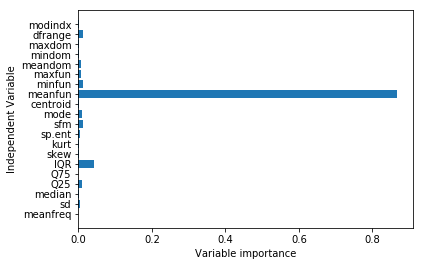

In [12]:
plot_feature_importances_mydata(tree)

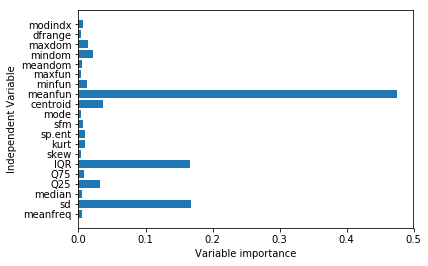

In [13]:

plot_feature_importances_mydata(forest)

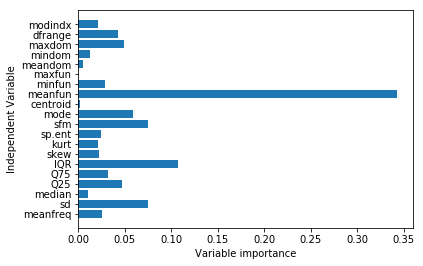

In [14]:

plot_feature_importances_mydata(gbrt)

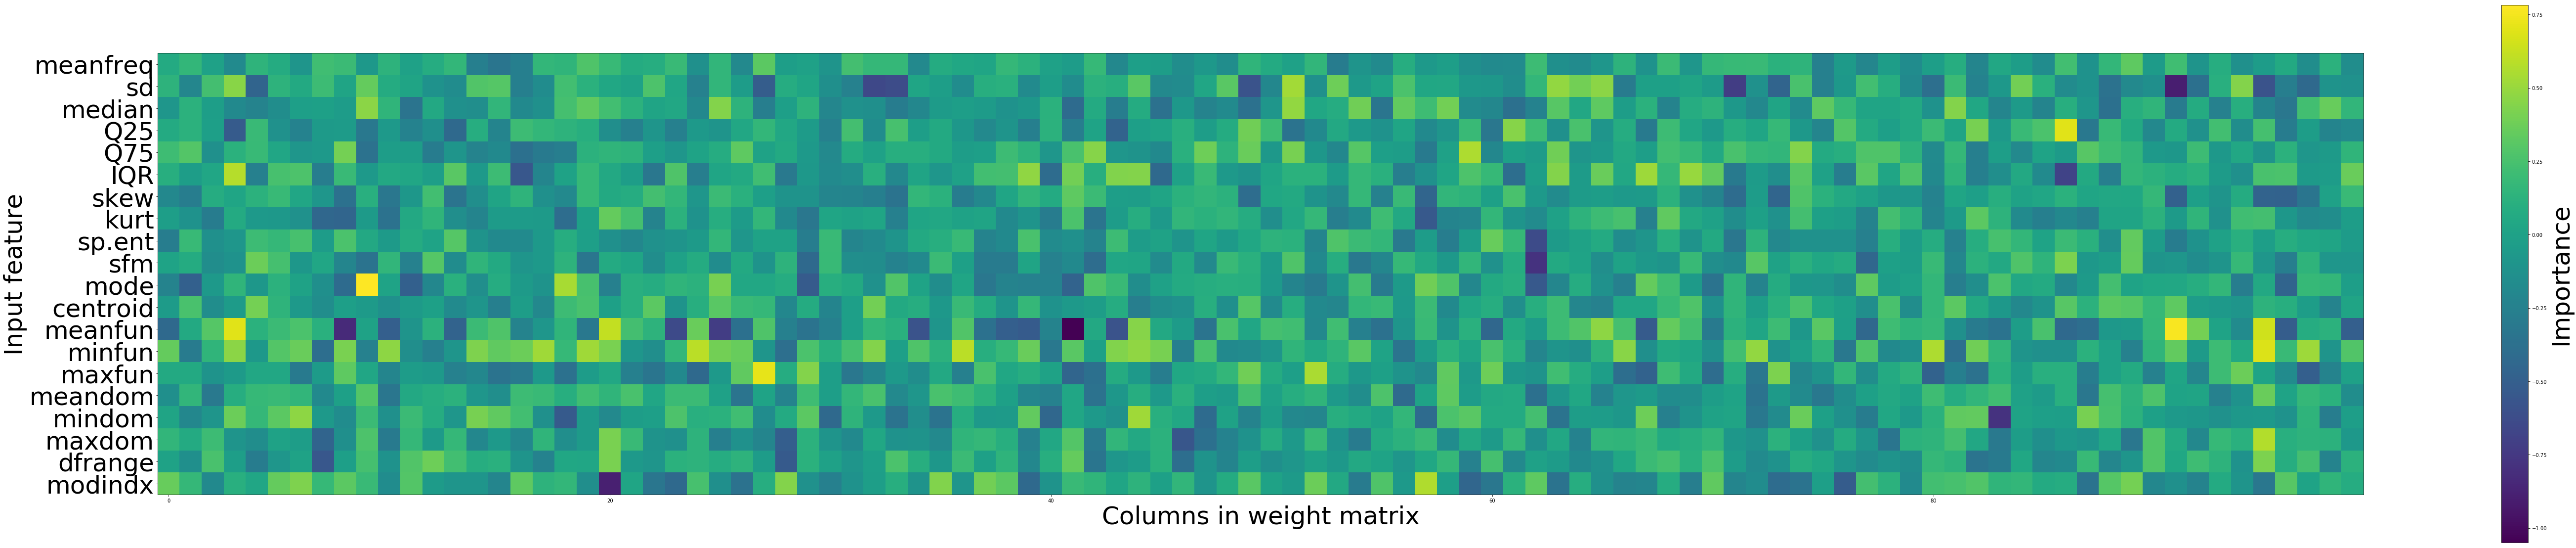

In [15]:


#Plot the heatmap on first layer weights for neural network
plt.figure(figsize=(100, 20))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(20), list(mydata),fontsize = 50)
plt.xlabel("Columns in weight matrix", fontsize = 50)
plt.ylabel("Input feature", fontsize = 50)
plt.colorbar().set_label('Importance',size=50)
    
plt.show()